# <font color='red'>Desafio – Cientista Geo</font>

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import linear_model
from sklearn import metrics
from sklearn.cluster import KMeans

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

from sklearn.model_selection import cross_validate,train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import statsmodels.api as sm
import os



sns.set()
%matplotlib inline

In [2]:
#Analisando os dados
df = pd.read_excel('DadosDesafioCientista.xlsx')
df

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,7557,5227,7999,942,1089,2866,2219,5285,NaN,NaN
452,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,9107,4608,4705,1726,1522,2458,1186,7418,NaN,NaN
453,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,26592,12579,13109,0,0,1758,4517,1252,NaN,NaN
454,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,28500,16700,19285,8,872,5093,8063,1936,NaN,NaN


In [3]:
#Substituindo os NaN por zeros, pois as células estão vazias, ainda serão preenchidas com as predições 
df.fillna(value=0, inplace=True)
df

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,popDe35a49,popDe50a59,popMaisDe60,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,rendaMedia,faturamento,potencial
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,2300,1784,2919,0,145,715,1242,2501,932515.0,Médio
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,5308,2403,2397,0,0,82,506,931,588833.0,Baixo
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,2076,1112,1419,0,96,404,652,2391,874200.0,Baixo
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,2007,1341,1986,114,178,393,517,3727,912226.0,Médio
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,12272,7157,8190,0,0,1089,2821,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,355030213,Vila Sônia,São Paulo,SP,34061,2908,1462,2253,2076,4579,7557,5227,7999,942,1089,2866,2219,5285,0.0,0
452,355030207,Vila Suzana,São Paulo,SP,35403,4127,1890,2678,2433,5855,9107,4608,4705,1726,1522,2458,1186,7418,0.0,0
453,355030162,Vila Terezinha,São Paulo,SP,122359,18304,9304,13258,9965,19248,26592,12579,13109,0,0,1758,4517,1252,0.0,0
454,355030157,Vila Zatt,São Paulo,SP,125864,14670,7305,11225,9338,18841,28500,16700,19285,8,872,5093,8063,1936,0.0,0


In [4]:
#Verificando os tipos dos dados em cada coluna
print(df.dtypes)

codigo            int64
nome             object
cidade           object
estado           object
população         int64
popAte9           int64
popDe10a14        int64
popDe15a19        int64
popDe20a24        int64
popDe25a34        int64
popDe35a49        int64
popDe50a59        int64
popMaisDe60       int64
domiciliosA1      int64
domiciliosA2      int64
domiciliosB1      int64
domiciliosB2      int64
rendaMedia        int64
faturamento     float64
potencial        object
dtype: object


In [5]:
#Contando quantos bairros temos de cada cidade
df_group = df.groupby(['estado'])['cidade'].count()
df_group

estado
RJ    160
SP    296
Name: cidade, dtype: int64

In [6]:
#Separando as colunas do público alvo
dfr = df[['nome','cidade','população','popDe25a34','popDe35a49','domiciliosA1',
          'domiciliosA2','domiciliosB1','domiciliosB2','rendaMedia','faturamento','potencial']]
dfr

,nome,cidade,população,popDe25a34,popDe35a49,domiciliosA1,domiciliosA2,domiciliosB1,domiciliosB2,rendaMedia,faturamento,potencial
0,Abolição,Rio de Janeiro,11676,1675,2300,0,145,715,1242,2501,932515.0,Médio
1,Acari,Rio de Janeiro,27564,4810,5308,0,0,82,506,931,588833.0,Baixo
2,Água Santa,Rio de Janeiro,9003,1755,2076,0,96,404,652,2391,874200.0,Baixo
3,Alto Da Boa Vista,Rio de Janeiro,9606,1317,2007,114,178,393,517,3727,912226.0,Médio
4,Anchieta,Rio de Janeiro,57222,8660,12272,0,0,1089,2821,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0


In [8]:
#Para ser melhor manipulável, vamos renomear as colunas
dfr.columns = ['nome','cidade','x1','x2','x3','x4','x5','x6','x7','x8','y','potencial']

dfr

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial
0,Abolição,Rio de Janeiro,11676,1675,2300,0,145,715,1242,2501,932515.0,Médio
1,Acari,Rio de Janeiro,27564,4810,5308,0,0,82,506,931,588833.0,Baixo
2,Água Santa,Rio de Janeiro,9003,1755,2076,0,96,404,652,2391,874200.0,Baixo
3,Alto Da Boa Vista,Rio de Janeiro,9606,1317,2007,114,178,393,517,3727,912226.0,Médio
4,Anchieta,Rio de Janeiro,57222,8660,12272,0,0,1089,2821,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0


### A seguir será feito uma correlação entre as variáveis que representam nosso público alvo e o faturamento, para se ter clareza da relação entre elas

<AxesSubplot:>

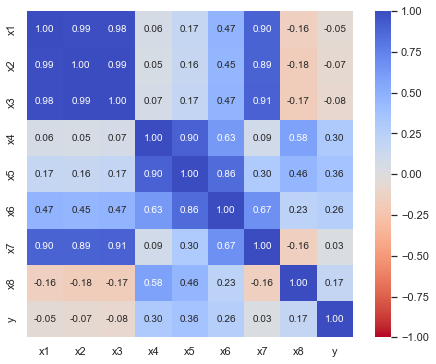

In [62]:
#Correlação entre as variáveis x_i e o y('faturamento'), que é o nosso alvo na regressão múltipla
fig, ax = plt.subplots(figsize=(8, 6))

corr = dfr.select_dtypes(include=np.number).corr()

sns.heatmap(
    corr, annot=True, fmt=".2f", ax=ax, square=True, cmap="coolwarm_r", vmin=-1, vmax=1
)

### Serão plotados os gráficos das variáveis alvo, para ser observado as variações dos dados.

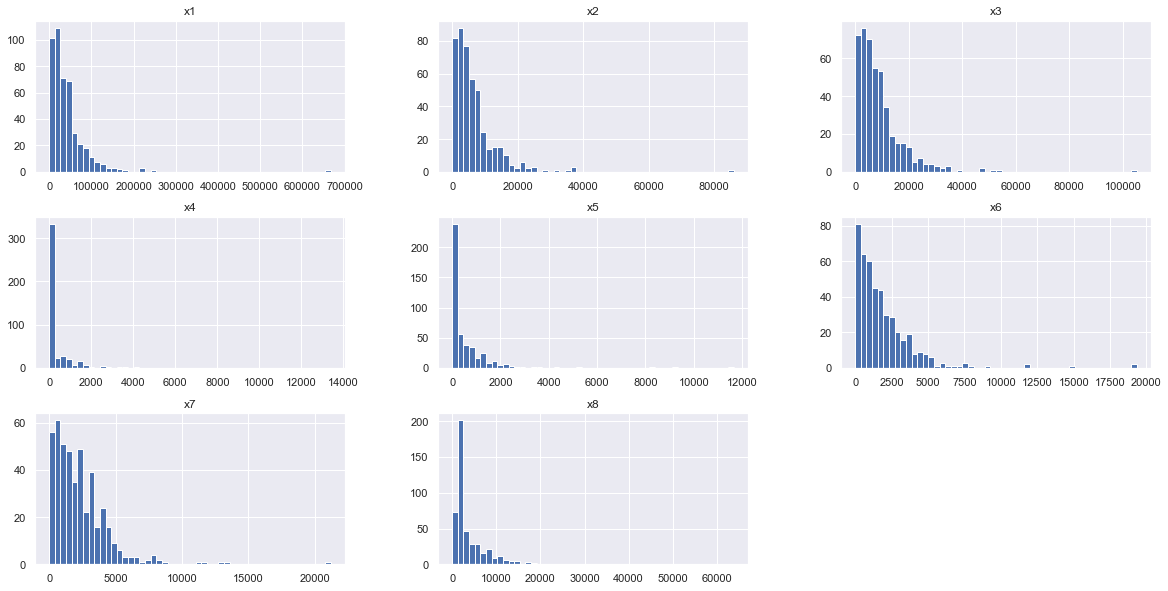

In [10]:
#Histogramas das variáveis x_i
dfr[['x1','x2','x3','x4','x5','x6','x7','x8']].hist(figsize=(20,10), bins=50);

### Analisado a correlação e os histogramas, será plotado os gráficos relacionando cada uma das variáveis alvo e a nossa variável resposta faturamento(y).

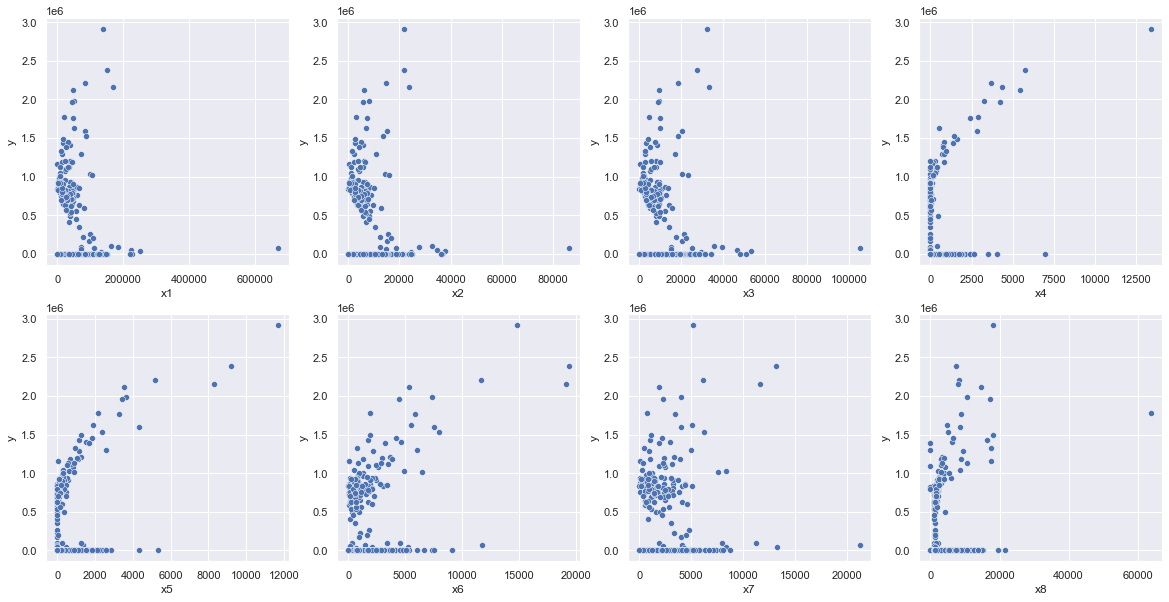

In [11]:
#Gráficos das relações das variáveis x_i e o faturamento(y)

fig,ax = plt.subplots(2,4, figsize=(20,10))
sns.scatterplot(x='x1',y='y',data = dfr,ax=ax[0][0]);
sns.scatterplot(x='x2',y='y',data = dfr,ax=ax[0][1]);
sns.scatterplot(x='x3',y='y',data = dfr,ax=ax[0][2]);
sns.scatterplot(x='x4',y='y',data = dfr,ax=ax[0][3]);
sns.scatterplot(x='x5',y='y',data = dfr,ax=ax[1][0]);
sns.scatterplot(x='x6',y='y',data = dfr,ax=ax[1][1]);
sns.scatterplot(x='x7',y='y',data = dfr,ax=ax[1][2]);
sns.scatterplot(x='x8',y='y',data = dfr,ax=ax[1][3]);

### A seguir o dataset será dividido por cidades, um apenas com os bairros do Rio de Janeiro, onde o modelo será treinado e testado. E, outro, com os bairros de São Paulo, o qual o modelo será aplicado e fara as predições.

In [12]:
groups = dfr.groupby(df.cidade)
rj_dfr = groups.get_group("Rio de Janeiro")
sp_dfr=groups.get_group("São Paulo")

In [13]:
rj_dfr

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial
0,Abolição,Rio de Janeiro,11676,1675,2300,0,145,715,1242,2501,932515.0,Médio
1,Acari,Rio de Janeiro,27564,4810,5308,0,0,82,506,931,588833.0,Baixo
2,Água Santa,Rio de Janeiro,9003,1755,2076,0,96,404,652,2391,874200.0,Baixo
3,Alto Da Boa Vista,Rio de Janeiro,9606,1317,2007,114,178,393,517,3727,912226.0,Médio
4,Anchieta,Rio de Janeiro,57222,8660,12272,0,0,1089,2821,1380,553020.0,Médio
...,...,...,...,...,...,...,...,...,...,...,...,...
155,Vila Kosmos,Rio de Janeiro,18791,2500,3944,0,259,774,1363,2316,901446.0,Médio
156,Vila Militar,Rio de Janeiro,13556,2542,2908,0,219,714,828,2416,849731.0,Médio
157,Vila Valqueire,Rio de Janeiro,33190,4752,7183,0,906,2866,2241,3189,1127042.0,Alto
158,Vista Alegre,Rio de Janeiro,8867,1205,1812,0,87,556,836,2418,921875.0,Baixo


In [14]:
sp_dfr

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial
160,A. E. Carvalho,São Paulo,94034,14535,21549,0,253,2197,4368,1501,0.0,0
161,Aclimação,São Paulo,32791,5341,7281,1413,1734,3704,2351,5920,0.0,0
162,Adventista,São Paulo,104193,17749,23364,0,0,1423,4875,1284,0.0,0
163,Água Branca,São Paulo,12721,2142,2833,624,667,1558,1032,6278,0.0,0
164,Água Funda,São Paulo,48417,7388,10751,0,303,1794,2986,1905,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0


In [15]:
#Descrição dos dados da tabela do Rio de Janeiro
rj_dfr.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,1.600000e+02
mean,42654.350000,6584.475000,8826.862500,388.475000,608.268750,1871.562500,2385.075000,3472.768750,8.761600e+05
std,64262.949072,9049.895783,11536.276416,1403.605232,1535.237669,2973.530791,2779.071565,6015.250999,4.382106e+05
min,173.000000,28.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.465100e+04
25%,13362.750000,2131.250000,2900.750000,0.000000,0.000000,391.500000,716.000000,1412.750000,7.112785e+05
50%,26076.000000,4170.500000,5657.000000,0.000000,107.500000,848.000000,1536.000000,1886.500000,8.242285e+05
75%,46504.500000,7145.250000,9586.750000,1.000000,430.500000,1962.500000,3065.750000,2927.500000,9.343208e+05
max,667603.000000,86116.000000,105316.000000,13408.000000,11668.000000,19350.000000,21237.000000,63887.000000,2.915612e+06


In [16]:
#Descrição dos dados da tabela de São Paulo
sp_dfr.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,y
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.0
mean,40653.581081,6440.503378,9137.668919,414.831081,565.925676,1911.422297,2250.064189,4012.540541,0.0
std,34746.006946,5630.254801,7810.300777,788.385885,712.885248,1495.615892,1697.740504,3581.697499,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,16321.250000,2398.500000,3632.750000,0.000000,34.250000,804.750000,930.000000,1561.250000,0.0
50%,33128.000000,5103.000000,7460.000000,13.000000,296.500000,1582.500000,1954.500000,2322.500000,0.0
75%,53581.000000,8555.500000,12244.500000,609.000000,866.750000,2713.500000,3312.000000,5626.000000,0.0
max,226226.000000,36577.000000,50773.000000,6982.000000,5362.000000,9111.000000,8744.000000,21677.000000,0.0


### Será feito uma regressão linear múltipla, para estipular o faturamento das lojas nos bairros de São Paulo.

In [54]:
#Regressão linear múltipla

x = rj_dfr.iloc[:, 2:-2]    #variáveis independentes
y = rj_dfr.iloc[:, -2]     #variável dependente

#Criando e ajustando o modelo
res = sm.OLS(y,x).fit() 

In [19]:
#Apresentando os dados da regressão
res.params

res.bse

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.700
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              44.41
Date:                Wed, 20 Jul 2022   Prob (F-statistic):                    4.59e-36
Time:                        11:42:23   Log-Likelihood:                         -2337.7
No. Observations:                 160   AIC:                                      4691.
Df Residuals:                     152   BIC:                                      4716.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -15.7486      4.910     -3.208      0.002     -25.449      -6.049
x2             8.4031     58.341      0.144      0.886    -106.860     123.667
x3            54.4932     47.039      1.158      0.248     -38.442     147.428
x4           112.5798    138.522      0.813      0.418    -161.096     386.256
x5          -360.5151    247.241     -1.458      0.147    -848.989     127.958
x6           272.6217    112.809      2.417      0.017      49.745     495.499
x7            57.2271     89.068      0.643      0.522    -118.743     233.198
x8            61.9321      7.714      8.028      0.000      46.691      77.173
==============================================================================
Omnibus:                      113.689   Durbin-Watson:                   1.244
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.434
Skew:                          -2.631   Prob(JB):                    7.09e-184
Kurtosis:                      12.942   Cond. No.                         536.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### O relatório anterior apresentou R-Squared ou R², que é o coeficiente de determinação da eficiência do modelo. Nesse caso, o modelo está funcionando com 70% de eficiência. Tem-se também o F-Statistic, que determina o quanto os dados estão dispersos, quanto maior o valor de F, mais dispersos os dados estão. Nesse caso o valor fornecido de 44.41 é um valor baixo, o que nos mostra a concentração dos dados.

### Notas:
### [1] R² é calculado sem centralização (descentralizado), pois o modelo não contém uma constante.

### [2] Erros padrão assumem que a matriz de covariância dos erros está especificada corretamente.

In [23]:
#Dados para predição
x_pred = sp_dfr.iloc[:, 2:-2]   

### Feito o modelo, testado e treinado, agora será aplicado nos dados que é de interesse predizer o faturamento.

In [24]:
#Estimando os dados de faturamento para os bairros de São Paulo
preds = res.predict(x_pred)
list(preds.astype(int))

[666178,
 970145,
 527877,
 674439,
 554147,
 807893,
 631767,
 1156661,
 735000,
 673282,
 871229,
 941332,
 232782,
 793985,
 173853,
 1049177,
 733691,
 124525,
 809746,
 594507,
 770061,
 919413,
 882981,
 190424,
 999913,
 73820,
 1000847,
 400206,
 839318,
 198725,
 963423,
 569383,
 1322213,
 623217,
 875765,
 851860,
 522102,
 903822,
 95216,
 86848,
 843009,
 50691,
 836951,
 866690,
 1152799,
 209670,
 157578,
 351793,
 778966,
 843591,
 1536597,
 1043573,
 582108,
 1173565,
 560424,
 523875,
 377521,
 452840,
 493579,
 283062,
 493886,
 1073043,
 1209666,
 506110,
 174796,
 292145,
 1201416,
 27923,
 268769,
 25309,
 521993,
 46150,
 0,
 218243,
 153111,
 371798,
 129070,
 738376,
 1213911,
 178591,
 112501,
 659049,
 868827,
 1091149,
 291179,
 630512,
 179568,
 818586,
 315409,
 464631,
 866838,
 442570,
 639944,
 527724,
 361350,
 550225,
 1101967,
 641357,
 125635,
 383353,
 829344,
 755790,
 679592,
 405783,
 824347,
 976738,
 734270,
 591723,
 91928,
 423640,
 644306,


In [56]:
sp_dfr['fatpreds']=preds

C:\Users\Mailine\AppData\Local\Temp/ipykernel_10164/1768368987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_dfr['fatpreds']=preds


### Segue a tabela de São Paulo com as predições de faturamento para cada bairro.

In [60]:
df_rgm = pd.merge(sp_dfr,sp_dfr['fatpreds'],how = 'left',left_index = True, right_index = True)
df_rgm

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial,preds,potpreds,fatpreds_x,fatpreds_y
160,A. E. Carvalho,São Paulo,94034,14535,21549,0,253,2197,4368,1501,0.0,0,0,Alto,6.661783e+05,6.661783e+05
161,Aclimação,São Paulo,32791,5341,7281,1413,1734,3704,2351,5920,0.0,0,0,Alto,9.701459e+05,9.701459e+05
162,Adventista,São Paulo,104193,17749,23364,0,0,1423,4875,1284,0.0,0,0,Médio,5.278772e+05,5.278772e+05
163,Água Branca,São Paulo,12721,2142,2833,624,667,1558,1032,6278,0.0,0,0,Alto,6.744400e+05,6.744400e+05
164,Água Funda,São Paulo,48417,7388,10751,0,303,1794,2986,1905,0.0,0,0,Alto,5.541473e+05,5.541473e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0,0,Alto,8.629515e+05,8.629515e+05
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0,0,Alto,8.309193e+05,8.309193e+05
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0,1,Alto,4.991478e+05,4.991478e+05
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0,1,Alto,1.385516e+06,1.385516e+06


### Em seguida, serão classificados os bairros de acordo com o potencial, "Baixo, Médio e Alto". Para essa predição, foi feito um algoritmo de árvore de decisão, testado e treinado, no dataset com informações do Rio de Janeiro, depois aplicado no dataset com as informações dos bairros de São Paulo.


In [25]:
#Começando a segunda etapa do desafio
u = rj_dfr.iloc[:, 2:-2]    # independent varible
v = rj_dfr.iloc[:, -1] 

In [26]:
u_train, u_test, v_train, v_test = train_test_split(u, v, test_size=0.3, random_state=1) # 70% training and 30% test

In [27]:
feature_cols = ['x1', 'x2', 'x3', 'x4','x5','x6','x7','x8']

### Abaixo tem-se o algoritmo da árvore de decisão sendo executado e logo após é exibido um número, que representa o quanto o modelo esta acertando nas predições. Nesse caso, tem-se aproximadamente 85,4% de acurácia, isto é, de precisão do modelo após o treino e teste.

In [28]:
#Criando a árvore de decisão 
clf = DecisionTreeClassifier()

#Treino 
clf = clf.fit(u_train,v_train)

#Predição
v_pred = clf.predict(u_test)

#Acurácia
print("Accuracy:",metrics.accuracy_score(v_test, v_pred))

Accuracy: 0.8541666666666666


### A figura abaixo mostra, como o modelo toma as decisões, até chegar na classficação do potencial.

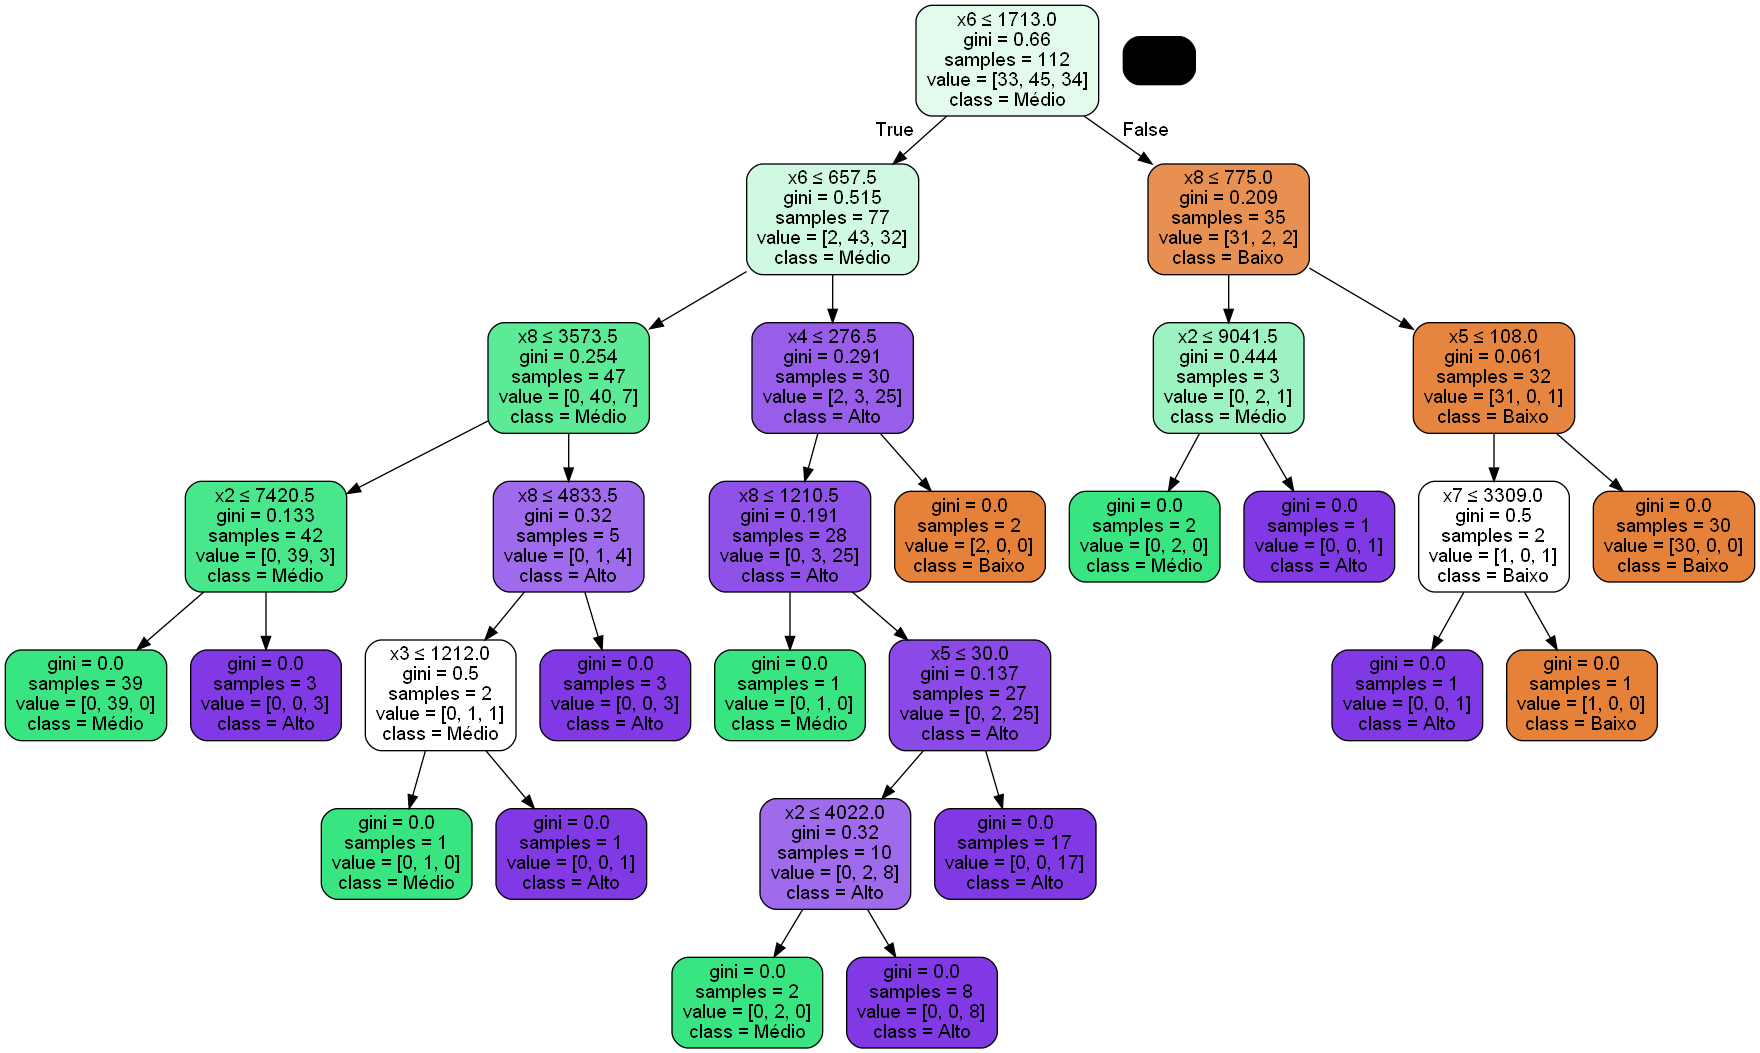

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Baixo','Médio','Alto'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [30]:
trepred = clf.predict(x_pred)
list(trepred)

['Alto',
 'Alto',
 'Médio',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 'Baixo',
 'Alto',
 'Baixo',
 'Alto',
 'Alto',
 'Baixo',
 'Alto',
 'Alto',
 'Alto',
 'Alto',
 'Alto',
 'Baixo',
 'Alto',
 'Baixo',
 'Alto',
 'Médio',
 'Alto',
 'Baixo',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 'Baixo',
 'Baixo',
 'Alto',
 'Baixo',
 'Alto',
 'Alto',
 'Alto',
 'Baixo',
 'Baixo',
 'Médio',
 'Alto',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 'Alto',
 'Médio',
 'Médio',
 'Médio',
 'Médio',
 'Baixo',
 'Médio',
 'Alto',
 'Alto',
 'Baixo',
 'Baixo',
 'Baixo',
 'Alto',
 'Baixo',
 'Baixo',
 'Baixo',
 'Médio',
 'Baixo',
 'Baixo',
 'Baixo',
 'Baixo',
 'Médio',
 'Médio',
 'Médio',
 'Alto',
 'Baixo',
 'Baixo',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Médio',
 'Médio',
 'Alto',
 'Baixo',
 'Baixo',
 'Alto',
 'Médio',
 'Alto',
 'Médio',
 'Médio',
 'Médio',
 'Alto',
 'Alto',
 'Baixo',
 'Médio',
 'Alto',
 'Alto',
 'Alto',
 'Médio',
 'Alto',
 '

In [50]:
sp_dfr['potpreds']=trepred

C:\Users\Mailine\AppData\Local\Temp/ipykernel_10164/905189041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_dfr['potpreds']=trepred


### Segue a tabela de São Paulo com as predições potencial para cada bairro.

In [53]:
df_pot = pd.merge(sp_dfr,sp_dfr['potpreds'],how = 'left',left_index = True, right_index = True)
df_pot

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial,preds,potpreds_x,potpreds_y
160,A. E. Carvalho,São Paulo,94034,14535,21549,0,253,2197,4368,1501,0.0,0,0,Alto,Alto
161,Aclimação,São Paulo,32791,5341,7281,1413,1734,3704,2351,5920,0.0,0,0,Alto,Alto
162,Adventista,São Paulo,104193,17749,23364,0,0,1423,4875,1284,0.0,0,0,Médio,Médio
163,Água Branca,São Paulo,12721,2142,2833,624,667,1558,1032,6278,0.0,0,0,Alto,Alto
164,Água Funda,São Paulo,48417,7388,10751,0,303,1794,2986,1905,0.0,0,0,Alto,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0,0,Alto,Alto
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0,0,Alto,Alto
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0,1,Alto,Alto
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0,1,Alto,Alto


## Aqui os bairros serão segmentados de acordo com a idade e a renda média, para obtermos os bairros de maior aderência ao público alvo.


In [31]:
#Separando os dados que serão usados, idades e renda média.
dfx = rj_dfr[['x2','x3', 'x8']]

C:\Users\Mailine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mailine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mailine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mailine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak o

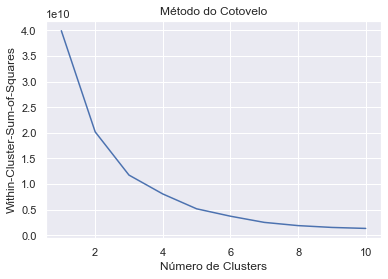

In [32]:
#Escolhendo a quantidade de clusters que serão usadas.
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans.fit(dfx)
    wcss.append(kmeans.inertia_)
    

plt.plot(range(1, 11), wcss)
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares")
plt.show()

## K=2

In [33]:
#De acordo com o gráfico do Método do Cotovelo, acima, K=2 é uma boa escolha
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
clusters = kmeans.fit_predict(dfx)
clusters

C:\Users\Mailine\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [34]:
dfx['Cluster'] = clusters

C:\Users\Mailine\AppData\Local\Temp/ipykernel_10164/2818544880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx['Cluster'] = clusters


In [35]:
boolArray = dfx['Cluster'] == 0
dfx[boolArray]

,x2,x3,x8,Cluster
0,1675,2300,2501,0
1,4810,5308,931,0
2,1755,2076,2391,0
3,1317,2007,3727,0
4,8660,12272,1380,0
...,...,...,...,...
155,2500,3944,2316,0
156,2542,2908,2416,0
157,4752,7183,3189,0
158,1205,1812,2418,0


In [36]:
boolArray = dfx['Cluster'] == 1
dfx[boolArray]

,x2,x3,x8,Cluster
8,37750,53090,1550,1
9,21914,32089,18084,1
23,86116,105316,1856,1
36,21814,27567,7381,1
72,32572,35693,2160,1
90,24528,29204,1107,1
117,27747,39378,1576,1
127,34697,46774,1188,1
141,23657,33313,7844,1


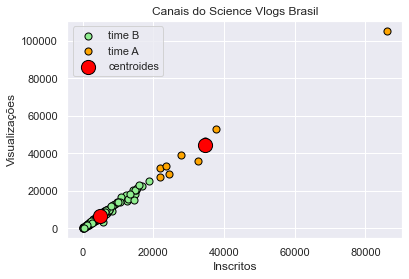

In [37]:
x = dfx.to_numpy()

plt.scatter(
    x[clusters == 0, 0], x[clusters == 0, 1],
    s=50, c='lightgreen',
    edgecolor='black',
    label='time B'
)

plt.scatter(
    x[clusters == 1, 0], x[clusters == 1, 1],
    s=50, c='orange',
    edgecolor='black',
    label='time A'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', edgecolor='black',
    label='centroides'
)
plt.title("Canais do Science Vlogs Brasil")
plt.xlabel("Inscritos")
plt.ylabel("Visualizações")

plt.legend()
plt.show()

### Podemos verificar que para o Cluster = 0 temos uma quantidade menor de pessoas de cada faixa etária, sendo x_1 a população de 25 a 34 anos e x_2 a população de 35 a 49 anos. Já o Cluster = 1, apresenta os bairros com maior concentração de pessoas nessas duas faixas.

In [38]:
dfx2 = sp_dfr[['x2','x3','x8']]

In [39]:
#Aplicando a clusterização nos dados de São Paulo
sppred = kmeans.predict(dfx2)
list(sppred)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [40]:
dfx2['Cluster'] = sppred

C:\Users\Mailine\AppData\Local\Temp/ipykernel_10164/158054724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfx2['Cluster'] = sppred


In [41]:
boolArray = dfx2['Cluster'] == 1
dfx2[boolArray]

,x2,x3,x8,Cluster
208,21851,29095,1324,1
219,36577,48286,1123,1
223,36410,50773,1121,1
242,24911,34039,1404,1
249,21246,31199,1182,1
285,23786,30913,1320,1
309,19137,26692,1259,1
329,24493,34208,1392,1
347,21068,26878,1187,1
382,20806,31195,2191,1


In [45]:
sp_dfr['preds']=sppred

C:\Users\Mailine\AppData\Local\Temp/ipykernel_10164/2185217892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp_dfr['preds']=sppred


### Segue a tabela de São Paulo, com as predições, de onde terão maior aderência, do público alvo, com a implementação das lojas.

In [49]:
df_out = pd.merge(sp_dfr,sp_dfr['preds'],how = 'left',left_index = True, right_index = True)
df_out

,nome,cidade,x1,x2,x3,x4,x5,x6,x7,x8,y,potencial,preds_x,preds_y
160,A. E. Carvalho,São Paulo,94034,14535,21549,0,253,2197,4368,1501,0.0,0,0,0
161,Aclimação,São Paulo,32791,5341,7281,1413,1734,3704,2351,5920,0.0,0,0,0
162,Adventista,São Paulo,104193,17749,23364,0,0,1423,4875,1284,0.0,0,0,0
163,Água Branca,São Paulo,12721,2142,2833,624,667,1558,1032,6278,0.0,0,0,0
164,Água Funda,São Paulo,48417,7388,10751,0,303,1794,2986,1905,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Vila Sônia,São Paulo,34061,4579,7557,942,1089,2866,2219,5285,0.0,0,0,0
452,Vila Suzana,São Paulo,35403,5855,9107,1726,1522,2458,1186,7418,0.0,0,0,0
453,Vila Terezinha,São Paulo,122359,19248,26592,0,0,1758,4517,1252,0.0,0,1,1
454,Vila Zatt,São Paulo,125864,18841,28500,8,872,5093,8063,1936,0.0,0,1,1


## Respondendo a questão:
### Dado a natureza do problema apresentado, você conhece algum outro dado externo, de fontes públicas ou de fontes privadas, que poderiam ser utilizados para agregar mais valor para o resultado? Se sim, explique o por quê.

Fazendo algumas pesquisas, encontrei no site: http://dados.prefeitura.sp.gov.br/pt_PT/group/demografia 
que contém conjuntos de dados em relação a demografia e outras características da cidade de São Paulo. Mas devido aos dados fornecidos serem específicos e baseados em um estudo feito na cidade do Rio de Janeiro, não foi encontrada nenhuma outra fonte que agregassse mais valor ao resultado encontrado. 